In [1]:
import ugradio
import ugradio.timing as time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy
from astropy.table import Table

%matplotlib inline
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 17})

# Galactic Coordinates Data Analysis:

In [2]:
gc_on_data = np.load('Data_lab2/galactic_coords_online_raw.npy')
gc_off_data = np.load('Data_lab2/galactic_coords_offline_raw.npy')

In [3]:
nsamples = 2048
vs = 2.2   # [MHz]
freqs = np.fft.fftshift(np.fft.fftfreq(nsamples, 1/vs))

fft_gc_on = np.fft.fftshift(np.fft.fft(gc_on_data))
fft_gc_off = np.fft.fftshift(np.fft.fft(gc_off_data))

power_gc_on = np.abs(fft_gc_on)**2
power_gc_off = np.abs(fft_gc_off)**2

avg_gc_on = np.mean(power_gc_on, axis=0)
avg_gc_off = np.mean(power_gc_off, axis=0)

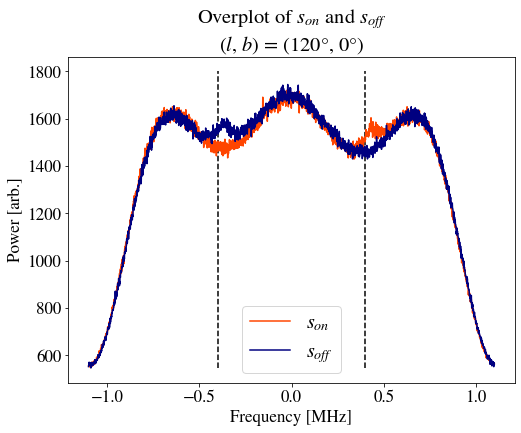

In [4]:
plt.figure(figsize=(8,6))
plt.title('Overplot of $s_{on}$ and $s_{off}$\n($l$, $b$) = ($120{\degree}$, $0\degree$)')
plt.plot(freqs, avg_gc_on, color='orangered', label='$s_{on}$')
plt.plot(freqs, avg_gc_off, color='navy', label='$s_{off}$')
plt.vlines(0.4, np.min(avg_gc_on), 1800, 'k', linestyle='--')
plt.vlines(-0.4, np.min(avg_gc_on), 1800, 'k', linestyle='--')
#plt.ylim(1300,1800)
plt.legend(fontsize=20)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.show()

## Shape Calibration (Line Shape)

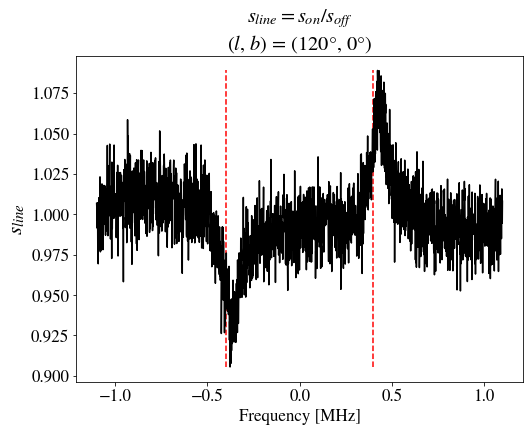

In [5]:
s_line = avg_gc_on/avg_gc_off

plt.figure(figsize=(8,6))
plt.plot(freqs, s_line, 'k')
plt.vlines(-0.4, np.min(s_line), np.max(s_line), 'red', linestyle='--')
plt.vlines(0.4, np.min(s_line), np.max(s_line), 'red', linestyle='--')
plt.title('$s_{line}=s_{on}/s_{off}$\n($l$, $b$) = ($120{\degree}$, $0\degree$)')
plt.ylabel('$s_{line}$', fontsize=21)
plt.xlabel('Frequency [MHz]')
plt.show()

## Gain Calibration (Line Intensity)

In [6]:
cold_data = np.load('Data_lab2/data2_cold_raw.npy')
cal_data = np.load('Data_lab2/data2_cal_raw.npy')

In [7]:
fft_cold = np.fft.fftshift(np.fft.fft(cold_data))
fft_cal = np.fft.fftshift(np.fft.fft(cal_data))

power_cold = np.abs(fft_cold)**2
power_cal = np.abs(fft_cal)**2

avg_cold = np.mean(power_cold, axis=0)
avg_cal = np.mean(power_cal, axis=0)

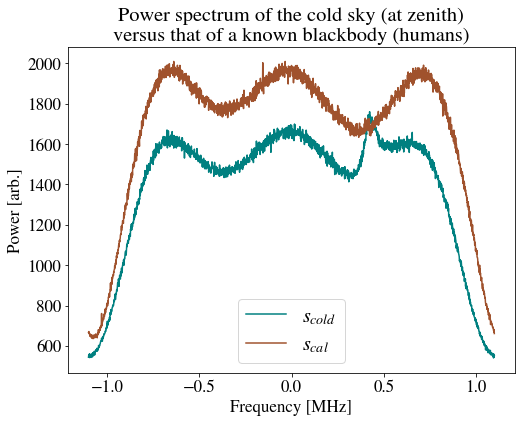

In [8]:
plt.figure(figsize=(8,6))
plt.plot(freqs, avg_cold, 'teal', label='$s_{cold}$')
plt.plot(freqs, avg_cal, 'sienna', label='$s_{cal}$')
plt.legend(fontsize=20)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.title('Power spectrum of the cold sky (at zenith)\nversus that of a known blackbody (humans)')
plt.show()

In [9]:
gain = (300/np.sum(np.fft.fftshift(avg_cal-avg_cold)))*np.sum(avg_cold)
print('Gain = {0:.2f}'.format(gain))

Gain = 1477.55


## Replotting in True Frequency

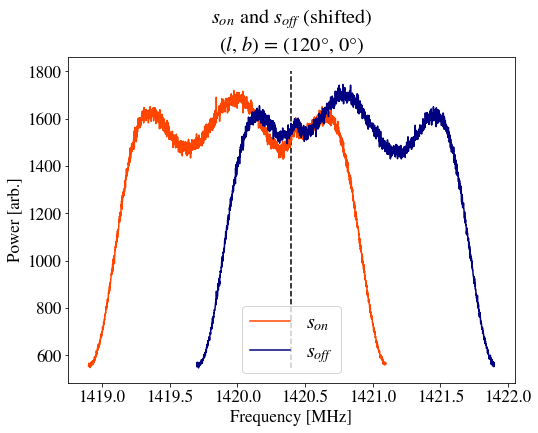

In [10]:
plt.figure(figsize=(8,6))
plt.title('$s_{on}$ and $s_{off}$ (shifted)\n($l$, $b$) = ($120{\degree}$, $0\degree$)')
plt.plot(freqs+1420, avg_gc_on, color='orangered', label='$s_{on}$')
plt.plot(freqs+1420.8, avg_gc_off, color='navy', label='$s_{off}$')
plt.vlines(0.4+1420, np.min(avg_gc_on), 1800, 'k', linestyle='--')
#plt.vlines(-0.4+1420.8, np.min(avg_gc_on), 1800, 'k', linestyle='--')
#plt.ylim(1300,1800)
plt.legend(fontsize=20)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.show()

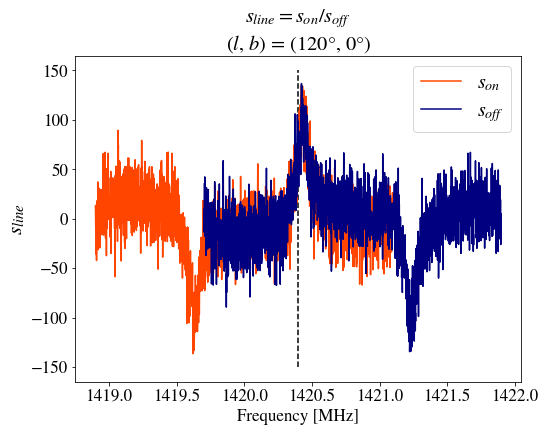

In [11]:
plt.figure(figsize=(8,6))
plt.plot(freqs+1420, (s_line- np.median(s_line))*gain, 'orangered', label='$s_{on}$')
plt.plot(freqs+1420.8, -(s_line- np.median(s_line))*gain, 'navy', label='$s_{off}$')
plt.vlines(1420.4, -150, 150, 'k', linestyle='--')
plt.title('$s_{line}=s_{on}/s_{off}$\n($l$, $b$) = ($120{\degree}$, $0\degree$)')
plt.ylabel('$s_{line}$', fontsize=21)
plt.xlabel('Frequency [MHz]')
plt.legend(fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

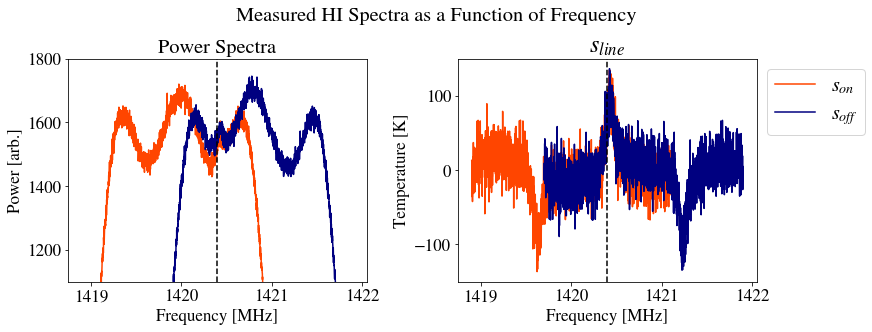

In [12]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,4.5), constrained_layout=True)

plt.suptitle('Measured HI Spectra as a Function of Frequency')

ax0.plot(freqs+1420, avg_gc_on, color='orangered', label='$s_{on}$')
ax0.plot(freqs+1420.8, avg_gc_off, color='navy', label='$s_{off}$')
ax0.axvline(0.4+1420, color='k', linestyle='--')
ax0.set_ylabel('Power [arb.]')
ax0.set_xlabel('Frequency [MHz]')
ax0.set_ylim(1100,1800)
ax0.set_title('Power Spectra')

ax1.plot(freqs+1420, (s_line - np.median(s_line))*gain, 'orangered', label='$s_{on}$')
ax1.plot(freqs+1420.8, -(s_line - np.median(s_line))*gain, 'navy', label='$s_{off}$')
ax1.axvline(1420.4, color='k', linestyle='--')
ax1.set_ylabel('Temperature [K]')
ax1.set_xlabel('Frequency [MHz]')
ax1.set_title('$s_{line}$', fontsize=24)

plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize=20)

## Calculating Doppler Velocity Correction

In [13]:
c = 3e5 # km/s
rest_freq  = 1420.4 # MHz

vel_on = -c*(((freqs+1420) - rest_freq)/rest_freq) # km/s
vel_off = -c*(((freqs + 1420.8) - rest_freq)/rest_freq) # km/s

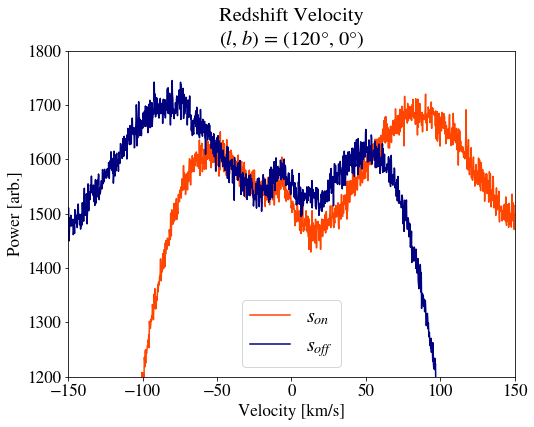

In [14]:
plt.figure(figsize=(8,6))
plt.title('Redshift Velocity\n($l$, $b$) = ($120{\degree}$, $0\degree$)')
plt.plot(vel_on, avg_gc_on, color='orangered', label='$s_{on}$')
plt.plot(vel_off, avg_gc_off, color='navy', label='$s_{off}$')
plt.legend(fontsize=20)
plt.xlabel('Velocity [km/s]')
plt.ylabel('Power [arb.]')
plt.ylim(1200,1800)
plt.xlim(-150,150)
plt.show()

Initial velocity calculation (km/s):  -4.682054790894366


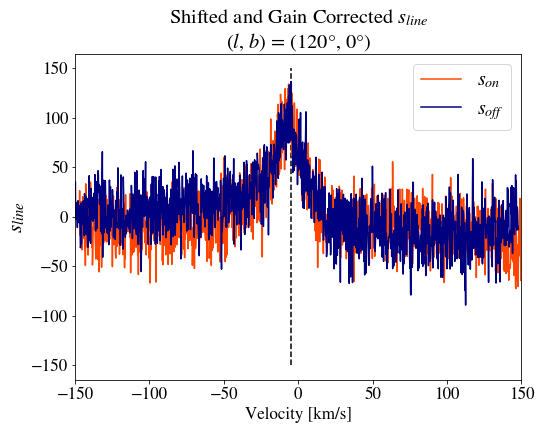

In [19]:
plt.figure(figsize=(8,6))
plt.plot(vel_on, (s_line - np.median(s_line))*gain, 'orangered', label='$s_{on}$')
plt.plot(vel_off, -(s_line - np.median(s_line))*gain, 'navy', label='$s_{off}$')

where = np.argwhere((s_line - np.median(s_line))*gain==np.max((s_line - np.median(s_line))*gain))[0][0]
print('Initial velocity calculation (km/s): ', vel_on[where])

plt.vlines(vel_on[where], -150, 150, 'k', linestyle='--')
plt.title('Shifted and Gain Corrected $s_{line}$\n($l$, $b$) = ($120{\degree}$, $0\degree$)')
plt.ylabel('$s_{line}$', fontsize=21)
plt.xlabel('Velocity [km/s]')
plt.xlim(-150,150)
plt.legend(fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

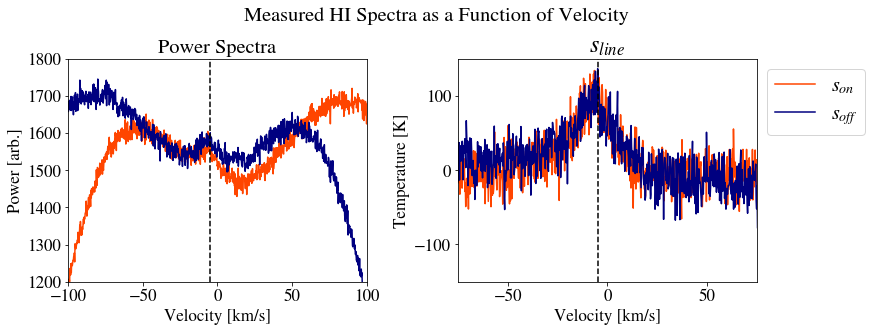

In [18]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,4.5), constrained_layout=True)

plt.suptitle('Measured HI Spectra as a Function of Velocity')

ax0.plot(vel_on, avg_gc_on, color='orangered', label='$s_{on}$')
ax0.plot(vel_off, avg_gc_off, color='navy', label='$s_{off}$')
#ax0.axvline(0.4+1420, color='k', linestyle='--')
ax0.set_ylabel('Power [arb.]')
ax0.set_xlabel('Velocity [km/s]')
ax0.set_ylim(1200,1800)
ax0.set_xlim(-100,100)
ax0.axvline(vel_on[where], color='k', linestyle='--')
ax0.set_title('Power Spectra')

ax1.plot(vel_on, (s_line - np.median(s_line))*gain, 'orangered', label='$s_{on}$')
ax1.plot(vel_off, -(s_line - np.median(s_line))*gain, 'navy', label='$s_{off}$')
ax1.axvline(vel_on[where], color='k', linestyle='--')
ax1.set_ylabel('Temperature [K]')
ax1.set_xlabel('Velocity [km/s]')
ax1.set_title('$s_{line}$', fontsize=24)
ax1.set_xlim(-75,75)

plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize=20)

In [135]:
RA = 6.24
DEC = 62.726

JD = 2459632.0472222

velocity_correction_LSR = ugradio.doppler.get_projected_velocity(RA, DEC, JD,)

print('Projected velocity of the telescope wrt the LSR: ', '{0:0.2f}'.format(velocity_correction_LSR))
print('In km/s: ', '{0:0.2f}'.format(velocity_correction_LSR.value/1e3))

redshift_velocity = '{0:0.2f}'.format(vel_on[where]+(velocity_correction_LSR.value/1e3))
print('The measured HI cloud is moving towards us at a velocity of ', redshift_velocity, 'km/s')

Projected velocity of the telescope wrt the LSR:  -16965.90 m / s
In km/s:  -16.97
The measured HI cloud is moving towards us at a velocity of  -21.65 km/s


## One-Gaussian Model

In [133]:
doppler_correction = velocity_correction_LSR.value/1e3

temp = ((s_line - np.median(s_line))*gain)[900:]
velocities = (vel_on + doppler_correction)[900:]

In [52]:
one_gaussian = ugradio.gauss.gaussfit(velocities, temp, amp=150, avg=-25, sig=10)
print('One Gaussian Fit:\n', one_gaussian)

One Gaussian Fit:
 {'amp': array([90.09066655]), 'avg': array([-24.65387311]), 'sig': array([10.16068016])}


<Figure size 432x288 with 0 Axes>

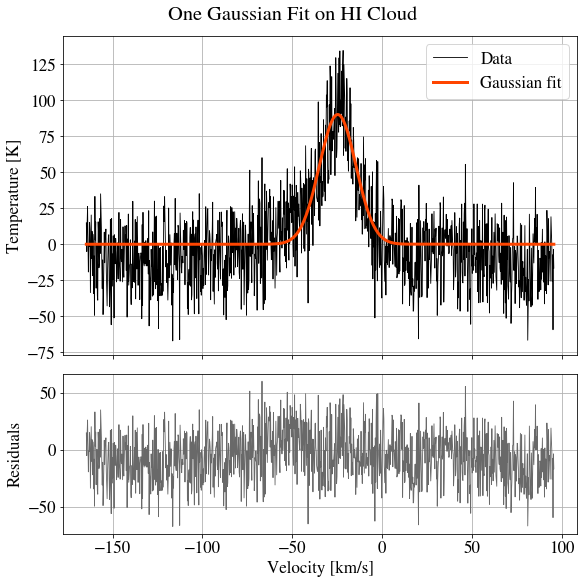

Slope of residuals:  -0.0032614279248479104


In [136]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, 
                               figsize=(8,8), 
                               constrained_layout=True, 
                               sharex=True, 
                               gridspec_kw={'height_ratios':[3, 1.5]})
plt.suptitle('One Gaussian Fit on HI Cloud')

ax0.set_ylabel('Temperature [K]')
ax1.set_xlabel('Velocity [km/s]')
ax1.set_ylabel('Residuals')

ax0.plot(velocities, temp, color='k', lw='0.85', label='Data')
ax0.plot(velocities, ugradio.gauss.gaussval(velocities, **one_gaussian), color='orangered', lw=3, label='Gaussian fit')
ax0.legend()
ax0.grid()

res_fit_one = np.polyfit(velocities, temp-ugradio.gauss.gaussval(velocities, **one_gaussian), 1)
ax1.plot(velocities, temp-ugradio.gauss.gaussval(velocities, **one_gaussian), color='dimgrey', lw=0.85, label='Residuals')
#ax1.plot(velocities, res_fit_one[0]*velocities + res_fit_one[1], color='red', label='Linear residual fit')
#ax1.legend()
ax1.grid()
plt.show()

print('Slope of residuals: ', res_fit_one[0])

In [137]:
chisq = []
amp_1 = np.linspace(one_gaussian['amp'][0] - 100, one_gaussian['amp'][0] + 100, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(temp - 
                               ugradio.gauss.gaussval(velocities,
                                                      [amp_1[i]],
                                                      one_gaussian['avg'],
                                                      one_gaussian['sig']))**2) / np.std(temp[:100])**2)
    
chisq = np.array(chisq)

chisq_amp_1 = chisq - np.min(chisq)



# ---------------------------------------------------------------------------------------------

chisq = []
avg_1 = np.linspace(one_gaussian['avg'][0] - 10, one_gaussian['avg'][0] + 10, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(temp - 
                               ugradio.gauss.gaussval(velocities,
                                                      one_gaussian['amp'],
                                                      [avg_1[i]],
                                                      one_gaussian['sig']))**2) / np.std(temp[:100])**2)
    
chisq = np.array(chisq)

chisq_avg_1 = chisq - np.min(chisq)


# ---------------------------------------------------------------------------------------------

chisq = []
sig_1 = np.linspace(one_gaussian['sig'][0] - 10, one_gaussian['sig'][0] + 10, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(temp - 
                               ugradio.gauss.gaussval(velocities,
                                                      one_gaussian['amp'],
                                                      one_gaussian['avg'],
                                                      [sig_1[i]]))**2) / np.std(temp[:100])**2)
    
chisq = np.array(chisq)

chisq_sig_1 = chisq - np.min(chisq)

In [138]:
params = np.array([amp_1, avg_1, sig_1])
names = np.array(["Temperature [K]",
                 "Velocity [km/s]",
                 "Std [km/s]"])
chis = np.array([chisq_amp_1,  chisq_avg_1,  chisq_sig_1])


def give_errors(chis):
    
    for i in range(3):
        for j in range(2):
            upper_bound = np.max([np.where(chis <= 4)])
            lower_bound = np.min([np.where(chis <= 4)])
            errors = [int(lower_bound), int(upper_bound)]
            
    return errors


final_errors = np.zeros((3,2))
for i in range(3):
    errors = give_errors(chis[i])
    upper_bound = errors[1]
    lower_bound = errors[0]
    final_errors[i] = [params[i][lower_bound] - params[i][np.argmin(chis[i])],
                         params[i][upper_bound] - params[i][np.argmin(chis[i])]]

        

final_errors = np.mean(np.abs(final_errors), axis=1)
        

print('One-Gaussian Model:')
for i in range(3):
    print(names[i], " = {0:0.2f} +\- {1:0.2f}".format(params[i][np.argmin(chis[i])], final_errors[i]))

One-Gaussian Model:
Temperature [K]  = 90.19 +\- 4.50
Velocity [km/s]  = -24.64 +\- 0.73
Std [km/s]  = 10.15 +\- 0.64


In [139]:
chisq_r_s = []
for i in range(1):
    chisq_r_s.append(np.sum(np.abs(temp - ugradio.gauss.gaussval(velocities, **one_gaussian))**2) / (temp.size - 3) / np.std(temp[:100])**2)
print("reduced χ^2 for one-Gaussian model = {0:0.2f}".format(np.average(chisq_r_s)))

reduced χ^2 for one-Gaussian model = 1.22


## Two-Gaussian Model

In [93]:
two_gaussian = ugradio.gauss.gaussfit(velocities, temp, amp=[50,150], avg=[-50,-25], sig=[5,10])
print('Two Gaussian Fit:\n', two_gaussian)

Two Gaussian Fit:
 {'amp': array([21.72794851, 94.6687569 ]), 'avg': array([-45.65891358, -23.21487833]), 'sig': array([9.30258454, 8.20050482])}


<Figure size 432x288 with 0 Axes>

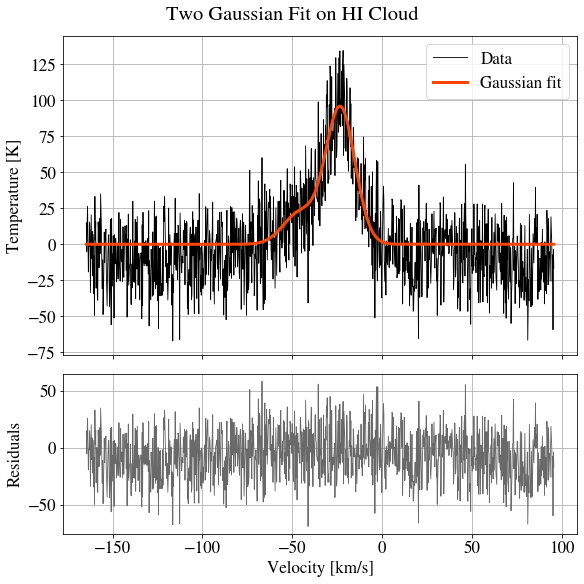

Slope of residuals:  0.0010106134801142416


In [140]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, 
                               figsize=(8,8), 
                               constrained_layout=True, 
                               sharex=True, 
                               gridspec_kw={'height_ratios':[3, 1.5]})
plt.suptitle('Two Gaussian Fit on HI Cloud')

ax0.set_ylabel('Temperature [K]')
ax1.set_xlabel('Velocity [km/s]')
ax1.set_ylabel('Residuals')

ax0.plot(velocities, temp, color='k', lw='0.85', label='Data')
ax0.plot(velocities, ugradio.gauss.gaussval(velocities, **two_gaussian), color='orangered', lw=3, label='Gaussian fit')
ax0.legend()
ax0.grid()

res_fit_two = np.polyfit(velocities, temp-ugradio.gauss.gaussval(velocities, **two_gaussian), 1)
ax1.plot(velocities, temp-ugradio.gauss.gaussval(velocities, **two_gaussian), color='dimgrey', lw=0.85, label='Residuals')
#ax1.plot(velocities, res_fit_one[0]*velocities + res_fit_one[1], color='red', label='Linear residual fit')
#ax1.legend()
ax1.grid()
plt.show()

print('Slope of residuals: ', res_fit_two[0])

In [141]:
print(res_fit_one[0], res_fit_two[0])
print('Residual slope minimized using two gaussian fit so we choose to use the two gaussian fit')

-0.0032614279248479104 0.0010106134801142416
Residual slope minimized using two gaussian fit so we choose to use the two gaussian fit


In [142]:
chisq = []
amp_1 = np.linspace(two_gaussian['amp'][0] - 100, two_gaussian['amp'][0] + 100, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(temp - 
                               ugradio.gauss.gaussval(velocities,
                                                      [amp_1[i],two_gaussian['amp'][1]],
                                                      two_gaussian['avg'],
                                                      two_gaussian['sig']))**2) / np.std(temp[:100])**2)
    
chisq = np.array(chisq)

chisq_amp_1 = chisq - np.min(chisq)


chisq = []
amp_2 = np.linspace(two_gaussian['amp'][1] - 100, two_gaussian['amp'][1] + 100, 1000)
for i in range(1000):
    chisq.append(np.sum(np.abs(temp - 
                               ugradio.gauss.gaussval(velocities,
                                                      [two_gaussian['amp'][0],amp_2[i]],
                                                      two_gaussian['avg'],
                                                      two_gaussian['sig']))**2) / np.std(temp[:100])**2)
    
chisq = np.array(chisq)

chisq_amp_2 = chisq - np.min(chisq)

# ---------------------------------------------------------------------------------------------

chisq = []
avg_1 = np.linspace(two_gaussian['avg'][0] - 10, two_gaussian['avg'][0] + 10, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(temp - 
                               ugradio.gauss.gaussval(velocities,
                                                      two_gaussian['amp'],
                                                      [avg_1[i], two_gaussian['avg'][1]],
                                                      two_gaussian['sig']))**2) / np.std(temp[:100])**2)
    
chisq = np.array(chisq)

chisq_avg_1 = chisq - np.min(chisq)


chisq = []
avg_2 = np.linspace(two_gaussian['avg'][1] - 10, two_gaussian['avg'][1] + 10, 1000)
for i in range(1000):
    chisq.append(np.sum(np.abs(temp - 
                               ugradio.gauss.gaussval(velocities,
                                                      two_gaussian['amp'],
                                                      [two_gaussian['avg'][0],avg_2[i]],
                                                      two_gaussian['sig']))**2) / np.std(temp[:100])**2)
    
chisq = np.array(chisq)

chisq_avg_2 = chisq - np.min(chisq)

# ---------------------------------------------------------------------------------------------

chisq = []
sig_1 = np.linspace(two_gaussian['sig'][0] - 10, two_gaussian['sig'][0] + 10, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(temp - 
                               ugradio.gauss.gaussval(velocities,
                                                      two_gaussian['amp'],
                                                      two_gaussian['avg'],
                                                      [sig_1[i], two_gaussian['sig'][1]]))**2) / np.std(temp[:100])**2)
    
chisq = np.array(chisq)

chisq_sig_1 = chisq - np.min(chisq)


chisq = []
sig_2 = np.linspace(two_gaussian['sig'][1] - 10, two_gaussian['sig'][1] + 10, 1000)
for i in range(1000):
    chisq.append(np.sum(np.abs(temp - 
                               ugradio.gauss.gaussval(velocities,
                                                      two_gaussian['amp'],
                                                      two_gaussian['avg'],
                                                      [two_gaussian['sig'][0], sig_2[i]]))**2) / np.std(temp[:100])**2)
    
chisq = np.array(chisq)

chisq_sig_2 = chisq - np.min(chisq)

In [143]:
params = np.array([amp_1, amp_2, avg_1, avg_2, sig_1, sig_2]).reshape(3,2,-1)
names = np.array(["1st Peak Temperature [K]", "2nd Peak Temperature [K]",
         "1st Peak Velocity [km/s]", "2nd Peak Velocity [km/s]",
         "1st Peak Std [km/s]", "2nd Peak Std [km/s]"]).reshape(3,2)
chis = np.array([chisq_amp_1, chisq_amp_2, chisq_avg_1, chisq_avg_2, chisq_sig_1, chisq_sig_2]).reshape(3,2,-1)


def give_errors(chis):
    
    for i in range(3):
        for j in range(2):
            upper_bound = np.max([np.where(chis <= 4)])
            lower_bound = np.min([np.where(chis <= 4)])
            errors = [int(lower_bound), int(upper_bound)]
            
    return errors


final_errors = np.zeros((3,2,2))
for i in range(3):
    for j in range(2):
        errors = give_errors(chis[i,j])
        upper_bound = errors[1]
        lower_bound = errors[0]
        final_errors[i,j] = [params[i, j][lower_bound] - params[i, j][np.argmin(chis[i, j])],
                             params[i, j][upper_bound] - params[i, j][np.argmin(chis[i, j])]]
        
        

final_errors = np.mean(np.abs(final_errors), axis=2)
        

print('Two-Gaussian Model:')
for i in range(3):
    for j in range(2):
        print(names[i,j], "= {0:0.2f} +\- {1:0.2f}".format(params[i, j][np.argmin(chis[i, j])], 
                                                               final_errors[i,j]))

Two-Gaussian Model:
1st Peak Temperature [K] = 21.83 +\- 4.70
2nd Peak Temperature [K] = 94.57 +\- 5.11
1st Peak Velocity [km/s] = -45.67 +\- 2.91
2nd Peak Velocity [km/s] = -23.22 +\- 0.61
1st Peak Std [km/s] = 9.29 +\- 2.30
2nd Peak Std [km/s] = 8.19 +\- 0.52


In [144]:
chisq_r = []
for i in range(10):
    chisq_r.append(np.sum(np.abs(temp - ugradio.gauss.gaussval(velocities, **two_gaussian))**2) / (temp.size - 3) / np.std(temp[:100])**2)
print("reduced χ^2 for two-Gaussian model = {0:0.3f}".format(np.average(chisq_r)))

reduced χ^2 for two-Gaussian model = 1.184
